# LEAD SCORING CASE STUDY

# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.The company markets its courses on several websites and search engines like Google.
Now, although X Education gets a lot of leads, its lead conversion rate is very poor.They want to increase the lead conversion rate.

## Business goal
The X Education company requires to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import the useful libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
import statsmodels.api as sm

In [7]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [8]:
## import below for vif calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading and Understanding the data

In [9]:
pd.set_option("display.max_columns",200)

In [10]:
## Reading the data set
LeadData = pd.read_csv('Leads.csv')

In [11]:
LeadData

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website           NaN   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9235                  2.67        Email Marked Spam  Saudi Arabia   
9236                  2.00                 SMS Sent         India   
9237                  2.00                 SMS Sent         India   
9238                  3.00                 SMS Sent         India   
9239                  3.00                 SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
0                        Select                             Select   
1                        Select                             Select   
2       Business Administration                             Select   
3         Media and Advertising                      Word Of Mouth   
4                        Select                              Other   
...                         ...                                ...   
9235     IT Projects Management                             Select   
9236      Media and Advertising                             Select   
9237    Business Administration                             Select   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                             Select   

     What is your current occu

In [12]:
##Checking the shape of dataset
LeadData.shape

(9240, 37)

In [13]:
# 9240 rows and 37 columns are present in the dataset

In [14]:
##Checking the info of dataset
LeadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# EDA

In [15]:
##Replacing 'Select' level with NaN

In [16]:
LeadData1 = LeadData.replace('Select', np.nan)

In [17]:
LeadData1.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No             NaN   
1                                No                        No             NaN   
2                                No                        No  Potential Lead   
3                            

## Data Cleaning

In [18]:
##Checking the null value percentage
LeadData1.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [19]:
# Cleaning the missing data

# listing the null values columns having more than 40%
ColsToDrop = list(LeadData1.columns[100*LeadData1.isnull().mean()>40])
len(ColsToDrop)

7

In [20]:
ColsToDrop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [21]:
## Drop columns having more than 40% null value
LeadData2=LeadData1.drop(ColsToDrop,axis=1)

In [22]:
LeadData2.shape

(9240, 30)

In [23]:
LeadData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Checking remaining categorical columns
## if missing value less than 40% and imputing them with proper values

In [24]:
 LeadData['Prospect ID'].nunique()

9240

In [25]:
 LeadData['Lead Number'].nunique()

9240

In [26]:
## no duplicate values in above columns

In [27]:
##after understanding the data, Prospect ID, Lead Number unique numbers

In [28]:
LeadData2['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [29]:
LeadData2['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [30]:
## repalcing 'google' with 'Google'
LeadData2['Lead Source'] = LeadData2['Lead Source'].replace('google','Google')


In [31]:
##replacing NAN,'bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel',
##'testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM', with 'Others' because these are less in numbers.
LeadData2['Lead Source'] =  LeadData2['Lead Source'].replace([np.nan,'bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'], 'Others')

In [32]:
LeadData2['Lead Source'].value_counts(dropna = False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                59
Facebook              55
Name: Lead Source, dtype: int64

In [33]:
LeadData2.shape

(9240, 30)

In [34]:
LeadData2['Do Not Email'].value_counts(dropna = False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [35]:
LeadData2['Do Not Call'].value_counts(dropna = False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [36]:
## imbalanced data 'Do Not Call'

In [37]:
LeadData2['Converted'].value_counts(dropna = False)

0    5679
1    3561
Name: Converted, dtype: int64

In [38]:
LeadData2['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
##Replacing NaN with 'Email opened'
LeadData2['Last Activity'] = LeadData2['Last Activity'].replace(np.nan, 'Email Opened')

In [40]:
##Rplacing less value counts with others
LeadData2['Last Activity'] = LeadData2['Last Activity'] .replace(['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [41]:
LeadData2['Last Activity'].value_counts(dropna = False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Others                         51
Name: Last Activity, dtype: int64

In [42]:
LeadData2['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [43]:
##Replacing NaN with ' India' beecause majority india
LeadData2['Country'] = LeadData2['Country'].replace(np.nan, 'India')

In [44]:
LeadData2['Country'].value_counts(dropna = False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [45]:
## most of them from India. so Country column will not have much impact on the data, so we can drop

In [46]:
LeadData2 = LeadData2.drop(['Country'],axis =1)

In [47]:
LeadData2.shape

(9240, 29)

In [48]:
LeadData2['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [49]:
##Replacing NaN with ' Not specified' , because more NaN
LeadData2['Specialization'] = LeadData2['Specialization'].replace(np.nan, 'Not specified')

In [50]:
LeadData2['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [51]:
#Replacing NaN with ' Unemployed' because of majority
LeadData2['What is your current occupation'] = LeadData2['What is your current occupation'].replace(np.nan, 'Unemployed')

In [52]:
LeadData2['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [53]:
#Replacing NaN with 'Better Career Prospects' because of majority
LeadData2['What matters most to you in choosing a course'] = LeadData2['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [54]:
LeadData2['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [55]:
##So 'What matters most to you in choosing a course' become imbanced data, we can remove this column

In [56]:
LeadData2['Search'].value_counts(dropna = False)

No     9226
Yes      14
Name: Search, dtype: int64

In [57]:
## imbalance data 'Search'

In [58]:
LeadData2['Magazine'].value_counts(dropna = False)

No    9240
Name: Magazine, dtype: int64

In [59]:
LeadData2['Newspaper Article'].value_counts(dropna = False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [60]:
LeadData2['X Education Forums'].value_counts(dropna = False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [61]:
LeadData2['Newspaper'].value_counts(dropna = False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [62]:
LeadData2['Digital Advertisement'].value_counts(dropna = False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [63]:
LeadData2['Through Recommendations'].value_counts(dropna = False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [64]:
LeadData2['Receive More Updates About Our Courses'].value_counts(dropna = False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [65]:
LeadData2['Update me on Supply Chain Content'].value_counts(dropna = False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [66]:
LeadData2['Get updates on DM Content'].value_counts(dropna = False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [67]:
LeadData2['I agree to pay the amount through cheque'].value_counts(dropna = False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [68]:
## after cheching the vale counts some columns are having un balanced data

imbcol = ['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course']
len(imbcol)

13

In [69]:
## Removing these columns
LeadData2=LeadData2.drop(imbcol,axis=1)

In [70]:
LeadData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

In [71]:
LeadData2.shape

(9240, 16)

In [72]:
LeadData2['A free copy of Mastering The Interview'].value_counts(dropna = False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [73]:
LeadData2['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [74]:
#Replacing NaN with 'Not specified', because more NaN
LeadData2['Tags'] = LeadData2['Tags'].replace(np.nan,'Not specified')

In [75]:
## data with less counts are replacing with 'Other'
LeadData2['Tags'] = LeadData2['Tags'].replace(['wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Other')

In [76]:
LeadData2['Tags'].value_counts(dropna = False)

Not specified                          3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Other                                   156
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
Name: Tags, dtype: int64

In [77]:
LeadData2.shape

(9240, 16)

In [78]:
LeadData2['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [79]:
##Replacing NaN with 'Not specified', because more NaN
LeadData2['City'] = LeadData2['City'].replace(np.nan,'Not specified')

In [80]:
LeadData2['Last Notable Activity'].value_counts(dropna = False)


Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [81]:
## less numbers are replacing with Others
LeadData2['Last Notable Activity'] = LeadData2['Last Notable Activity'] .replace(['Had a Phone Conversation','View in browser link Clicked','Email Received','Email Marked Spam','Approached upfront','Resubscribed to emails','Form Submitted on Website'],'Others')

In [82]:
LeadData2.shape

(9240, 16)

In [ ]:
##Checking null valuse in numerical column

In [83]:
LeadData2['TotalVisits'].value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [84]:
LeadData2['TotalVisits'].median()

3.0

In [85]:
##Replacing the null with median
LeadData2['TotalVisits'] = LeadData2['TotalVisits'].replace(np.nan,LeadData2['TotalVisits'].median())

In [86]:
LeadData2['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [87]:
LeadData2['Page Views Per Visit'].median()

2.0

In [88]:
##Replacing the null with median
LeadData2['Page Views Per Visit'] = LeadData2['Page Views Per Visit'].replace(np.nan,LeadData2['Page Views Per Visit'].median())

In [89]:
LeadData2['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1932
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [90]:
pd.set_option("display.max_rows",200)

## Visualisation of data

In [91]:
## Boxplot for numerical variable to check outliers
numcol = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

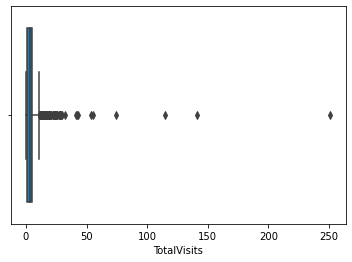

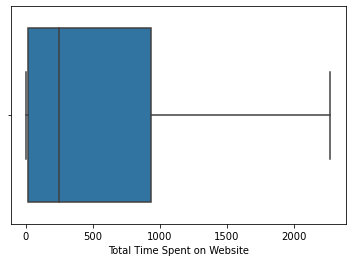

In [92]:
for i in numcol:
    sns.boxplot(LeadData2[i])
    plt.show() 
    

In [93]:
## outliers are present in TotalVisits','Page Views Per Visit'
## no outliers are present in 'Total Time Spent on Website'

In [94]:
##Removing outliers  present in TotalVisits','Page Views Per Visit'
##using interquartile, creating lower and upper boundary and capping outliers with these.

In [95]:
q1 = LeadData2['TotalVisits'].describe()['25%']
q3 =  LeadData2['TotalVisits'].describe()['75%']
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr
LeadData2['TotalVisits'] = np.where(LeadData2['TotalVisits']<lb,lb,LeadData2['TotalVisits'])
LeadData2['TotalVisits'] = np.where(LeadData2['TotalVisits']>ub,ub,LeadData2['TotalVisits'])

In [96]:
LeadData2.shape

(9240, 16)

In [97]:
q1 = LeadData2['Page Views Per Visit'].describe()['25%']
q3 = LeadData2['Page Views Per Visit'].describe()['75%']
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr
LeadData2['Page Views Per Visit'] = np.where(LeadData2['Page Views Per Visit']<lb,lb,LeadData2['Page Views Per Visit'])
LeadData2['Page Views Per Visit'] = np.where(LeadData2['Page Views Per Visit']>ub,ub,LeadData2['Page Views Per Visit'])

In [98]:
LeadData2.shape

(9240, 16)

In [99]:
##Box plot of  TotalVisits','Page Views Per Visit' after outlier treatment

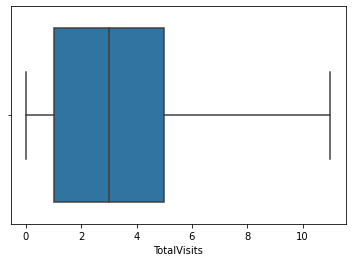

In [100]:
sns.boxplot(LeadData2['TotalVisits'])
plt.show()

In [101]:
sns.boxplot(LeadData2['Page Views Per Visit'])
plt.show()

In [102]:
## form above we can tell that ouliers are removed

In [103]:
##Visualisation of numeric col VS Target column

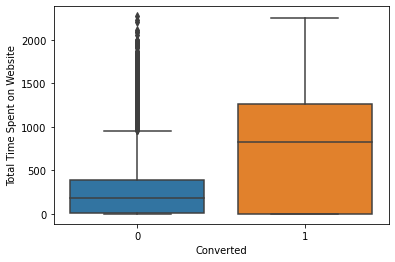

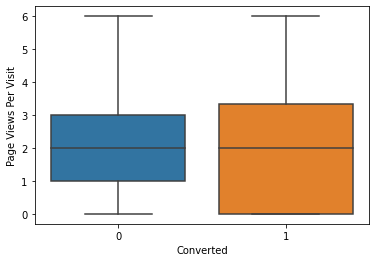

In [104]:
for i in numcol:
    sns.boxplot(y = LeadData2[i], x= 'Converted', data = LeadData2)
    plt.show() 
    

In [105]:
##Observations from the above:
## we cannot tell that if 'Total visits' more then the lead conversion become more, because the median of converted and non convertd same  in TotalVisits.
##'Total time spent on website' is more then the lead conversion also more.
## we cannot tell that if 'Page views per visits' more then the lead conversion become more, because the median of converted and non convertd same  in Page views per visits

In [106]:
## count plot for Categorical columns
catcol = ['Lead Origin', 'Lead Source','Do Not Email','Last Activity','Specialization','What is your current occupation','Tags','City','A free copy of Mastering The Interview','Last Notable Activity']

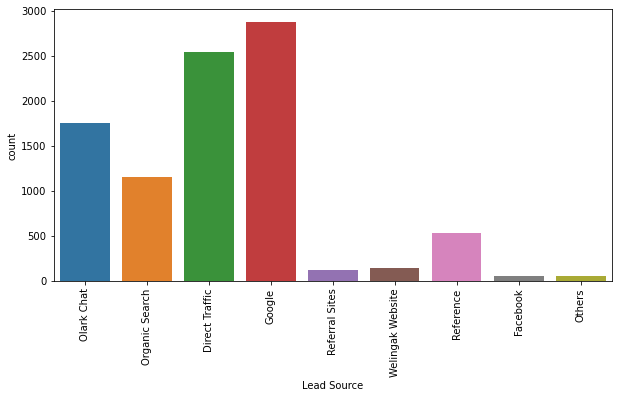

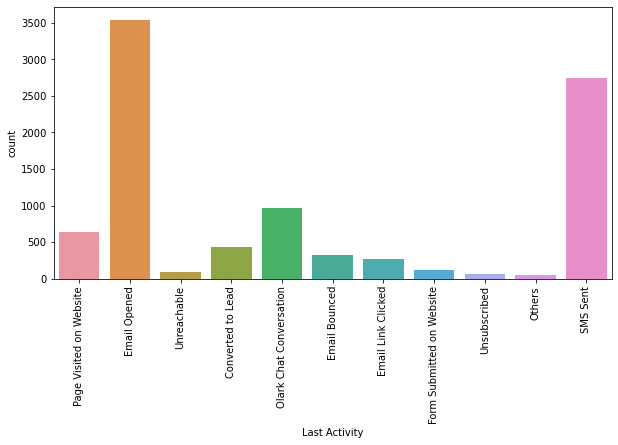

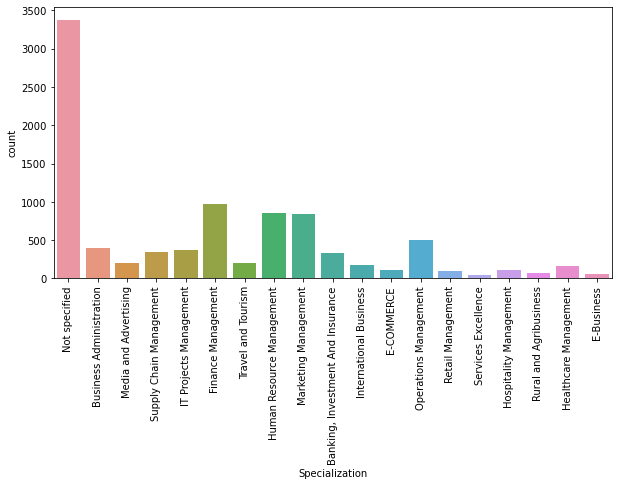

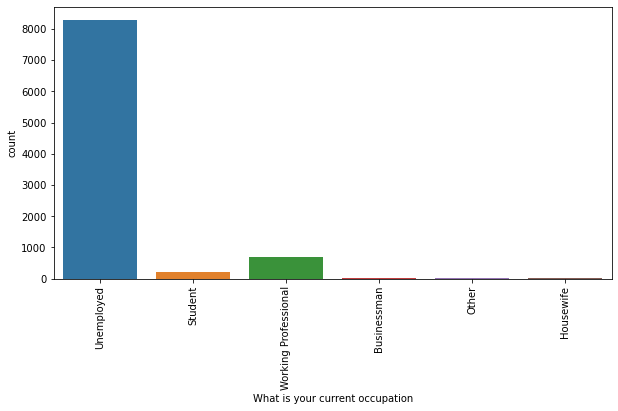

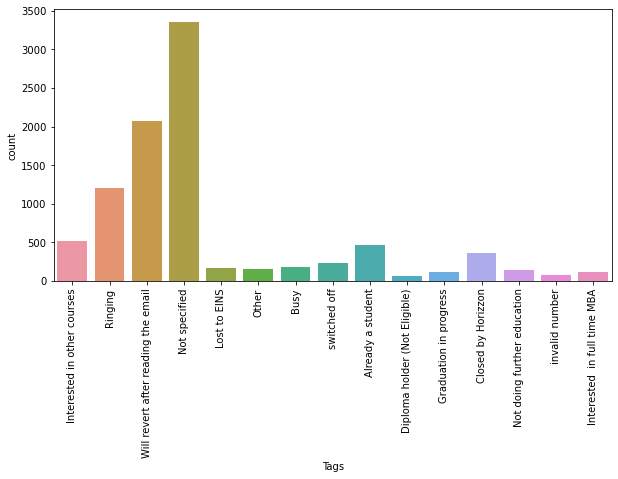

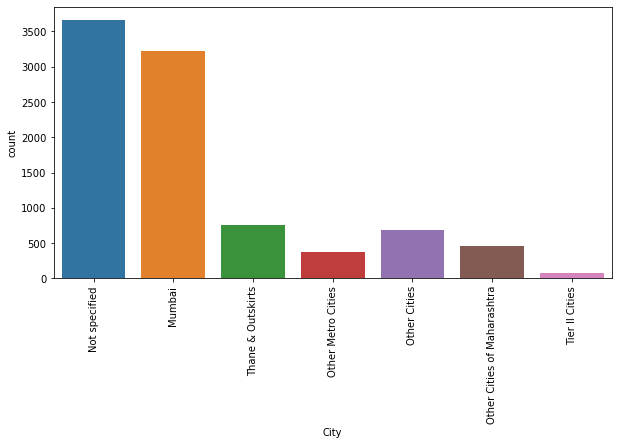

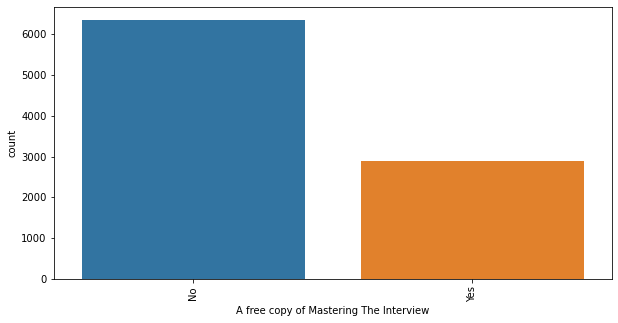

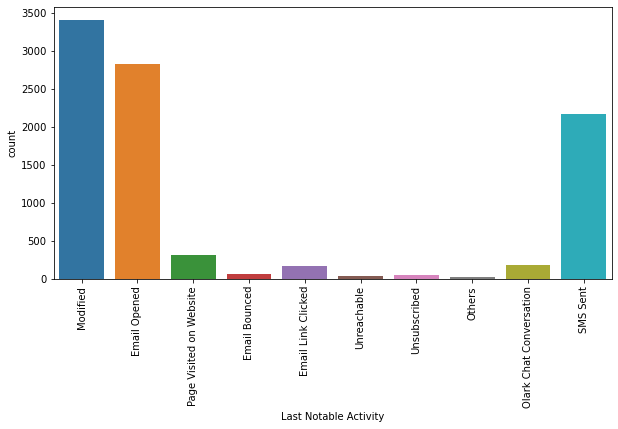

In [107]:
for i in catcol:
    plt.figure(figsize=(10,5))
    sns.countplot(LeadData2[i])
    plt.xticks(rotation=90)
    plt.show()

In [108]:
## observations:
##'Lead Origin' count is more of Landing page submission
##'Lead Source', more from Google
##'Do Not Email',more need email
##'Last Activity',more Email opened then SMS sent
##'Specialization',more not specified and then from management spec(loke Finance, HR, marketing etc )
##'What is your current occupation',mmore from unemployed, then Working professional
##'Tags', more not specified and then will revert after reading the email
##'City',more notspecified and then Mumbai
##'A free copy of Mastering The Interview', more responds no
##'Last Notable Activity'more modified, Email opened and then SMS sent

In [109]:
##Multivariant analysis
##Categorical column Vs Target

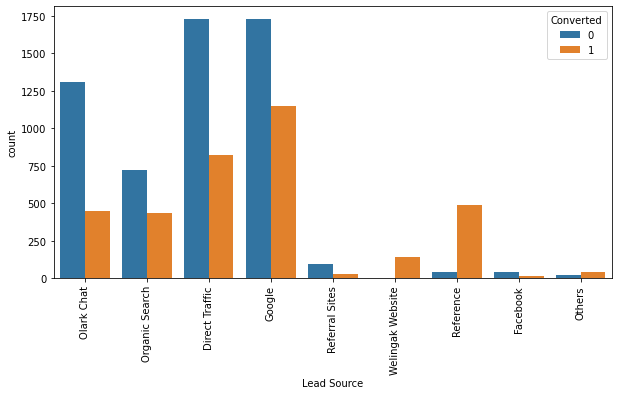

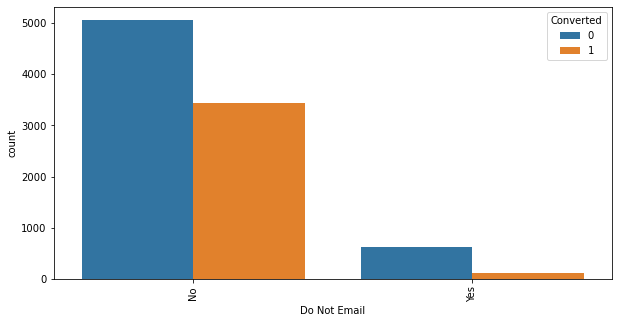

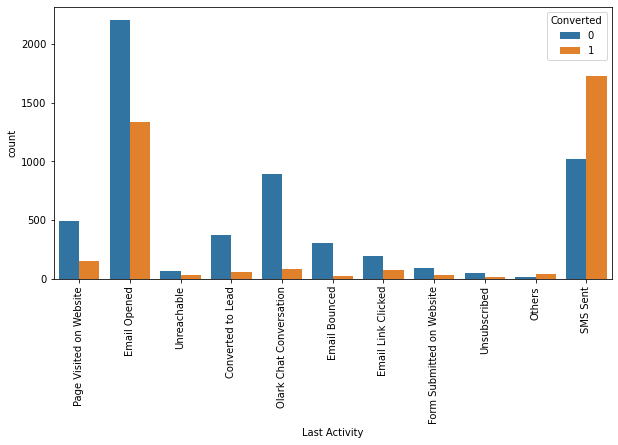

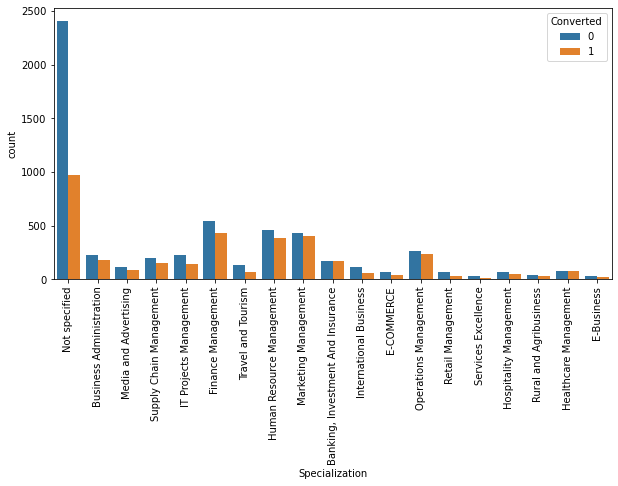

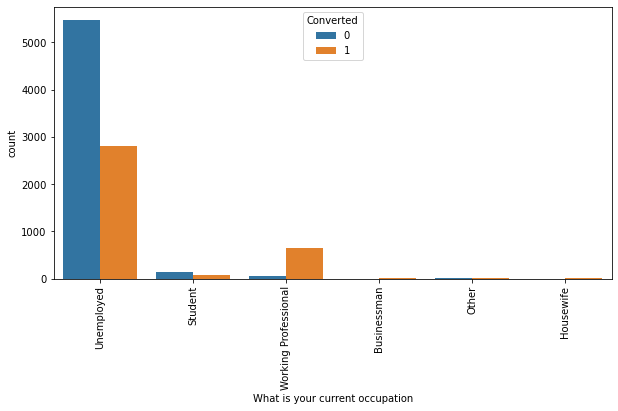

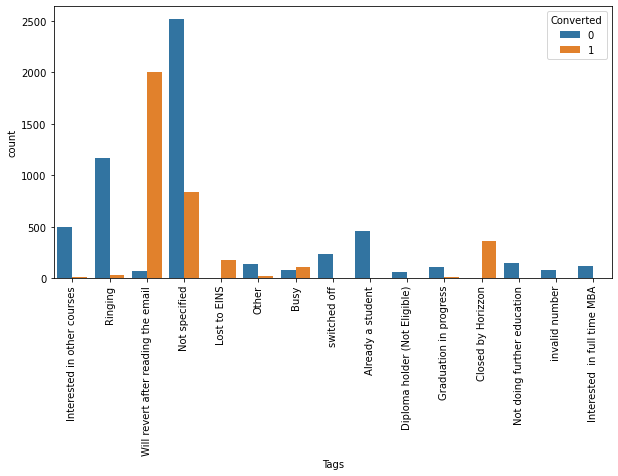

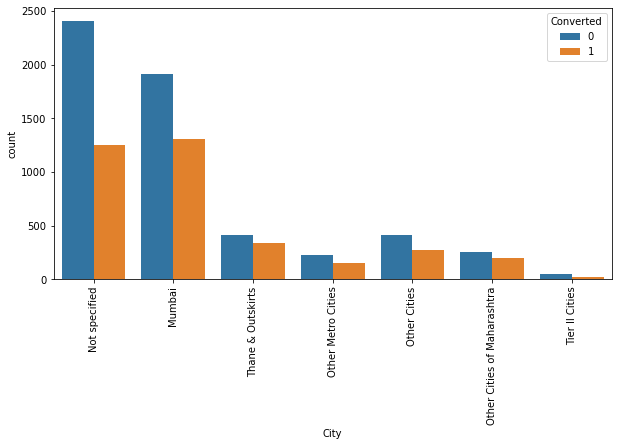

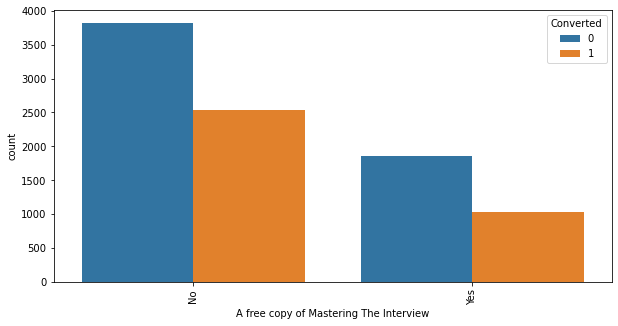

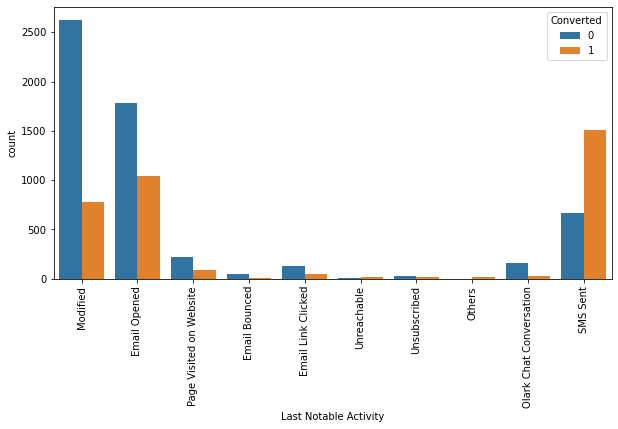

In [110]:
for i in catcol:
    plt.figure(figsize=(10,5))
    sns.countplot(x = LeadData2[i], hue= LeadData2['Converted'], data =  LeadData2)
    plt.xticks(rotation=90)
    plt.show()

In [111]:
## OBSERVATIONS
## 'Lead origine': converted count more in 'Landing page submission' and then 'API' then  "Lead Add Form".Non converted vey less in 'Lead Add Form' 
##'Lead source' : 'Converted count more with 'Google', 'Direct traffic' and then Reference', Non converted vey less in 'Reference' 
##'Do Not Email' : Converted rate is more with people they want Email
##'Last Activity': conversion count is more with 'Email Opened' and then'Sent SMS'.Non converted count less in 'Sent SMS'
##'Specialization' : conversion count is more with Not Specified and then Finance , HR, marketing management .Non converted count less in Finance , HR, marketing management.
##'what is your current occupation' : converted count is more UnEmployed and then Working professionals.Non converted count less with Working professionals
##'Tags' : conversion count more with 'will revert back after reading the email' and then 'Not Specified' , and 'Closed by Horizzon'.Non converted rate is less in 'will revert back after reading the email' and 'Closed by Horizzon'.
##'City' : Conversion cont is almost same for 'Not specified' and Mumbai.
##'A free copy of Mastering Interview': Conversion count more with 'No'
##'Last Notable Activity' :with 'SMS sent' is having more converted count then 'Email Opened'

In [112]:
##Check Correlation between variables using heatmap
plt.figure(figsize = (12,8))
sns.heatmap(LeadData2.corr(), annot = True, cmap = "YlGnBu")

<AxesSubplot:>

In [113]:
## 'TotalVisits', 'Total Time Spent on Website' are positively correlated with target variable'Converted'
## 'Page Views Per Visit' negatively correlated with target variable.

In [114]:
##Checking the 'Converted ' rate
converted = (sum(LeadData2['Converted'])/len(LeadData2['Converted'].index))*100
converted

38.53896103896104

In [115]:
##Conversion rate is 38.5%

# Data Preparation

In [116]:
##Converting binary variales (Yes/No) to 1/0

In [117]:
##List of variables for map
varmap = ['Do Not Email','A free copy of Mastering The Interview']

In [118]:
## define map function
def binarymap(x):
    return x.map({'Yes':1,'No':0})
    



In [119]:
LeadData2[varmap] = LeadData2[varmap].apply(binarymap)

In [120]:
LeadData2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0            Not specified                      Unemployed   
1            Not specified                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4            Not specified                      Unemployed   

                                  Tags           City  \
0          Interested in other courses  Not specified   
1                              Ringing  Not specified   
2  Will revert after reading the email         Mumbai   
3                              Ringing         Mumbai   
4  Will revert after reading the email         Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [121]:
LeadData2.shape

(9240, 16)

## Dummy variable creation 

In [122]:
## Creating dummy for 'Lead Origin'
lo = pd.get_dummies(LeadData2['Lead Origin'],prefix = 'Lead Origin')
lo1 = lo.drop(['Lead Origin_Quick Add Form'],1)
##Adding the result to the master data set
LeadData2 = pd.concat([LeadData2,lo1], axis = 1)

In [123]:
LeadData2.shape

(9240, 20)

In [124]:
## Creating dummy for 'Lead Source'
ls = pd.get_dummies(LeadData2['Lead Source'],prefix = 'Lead Source')
ls1 = ls.drop(['Lead Source_Others'],1)
##Adding the result to the master data set
LeadData2 = pd.concat([LeadData2,ls1], axis = 1)

In [125]:
LeadData2.shape

(9240, 28)

In [126]:
## Creating dummy for ' Last Activity'
la = pd.get_dummies(LeadData2['Last Activity'],prefix = 'Last Activity')
la1 = la.drop(['Last Activity_Others'],1)
##Adding the result to the master data set
LeadData2= pd.concat([LeadData2,la1], axis = 1)

In [127]:
LeadData2.shape

(9240, 38)

In [128]:
## Creating dummy for 'Specialization'
sp = pd.get_dummies(LeadData2['Specialization'],prefix = 'Specialization')
sp1 = sp.drop(['Specialization_Services Excellence'],1)
##Adding the result to the master data set
LeadData2= pd.concat([LeadData2,sp1], axis = 1)

In [129]:
LeadData2.shape

(9240, 56)

In [130]:
## Creating dummy for 'What is your current occupation'
co = pd.get_dummies(LeadData2['What is your current occupation'],prefix = 'What is your current occupation')
co1 = co.drop(['What is your current occupation_Businessman'],1)
##Adding the result to the master data set
LeadData2 = pd.concat([LeadData2,co1], axis = 1)

In [131]:
LeadData2.shape

(9240, 61)

In [132]:
## Creating dummy for 'Tags'
tg = pd.get_dummies(LeadData2['Tags'],prefix = 'Tags')
tg1 = tg.drop(['Tags_Diploma holder (Not Eligible)'],1)
##Adding the result to the master data set
LeadData2 = pd.concat([LeadData2,tg1], axis = 1)

In [133]:
LeadData2.shape

(9240, 75)

In [134]:
## Creating dummy for 'City'
cy = pd.get_dummies(LeadData2['City'],prefix = 'City')
cy1 = cy.drop(['City_Tier II Cities'],1)
##Adding the result to the master data set
LeadData2 = pd.concat([LeadData2,cy1], axis = 1)

In [135]:
LeadData2.shape

(9240, 81)

In [136]:
## Creating dummy for 'Last Notable Activity'
ln = pd.get_dummies(LeadData2['Last Notable Activity'],prefix = 'Last Notable Activity')
ln1 = ln.drop(['Last Notable Activity_Others'],1)
##Adding the result to the master data set
LeadData2 = pd.concat([LeadData2,ln1], axis = 1)

In [137]:
LeadData2.shape

(9240, 90)

In [138]:
LeadData2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0            Not specified                      Unemployed   
1            Not specified                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4            Not specified                      Unemployed   

                                  Tags           City  \
0          Interested in other courses  Not specified   
1                              Ringing  Not specified   
2  Will revert after reading the email         Mumbai   
3                              Ringing         Mumbai   
4  Will revert after reading the email         Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  \
0                                       0              Modified   
1                                       0          Email Opened   
2                                       1          Email Opened   
3                                       0              Modified   
4                                       0              Modified   

   Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Reference  \
0                       1                           0                      0   
1                       0                           1                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0      

In [160]:
##Drop original varibles

In [139]:
LeadData2 = LeadData2.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity'],axis = 1)

In [140]:
LeadData2.shape

(9240, 82)

# Splitting the data into Train - Test set


In [141]:
##Creationn X variables , dropping target variable 'Converted' from X
X = LeadData2.drop('Converted',axis = 1)

In [142]:
X.shape

(9240, 81)

In [143]:
##Creating y variables , by putting target variable 'Converted' to y
y = LeadData2['Converted']

In [144]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [145]:
X_train.shape

(6468, 81)

In [146]:
X_train.head()

Prospect ID  Lead Number  Do Not Email  \
1871  f3af2d98-02db-45d7-bbf6-c641d6b4f4c3       641410             0   
6795  207aaf73-a121-41b8-96bb-b0d5c38e7a7b       597687             0   
3516  db308a34-ade6-4f0d-9779-586c5be188c7       626825             0   
8105  1199b37d-f610-4bb8-bf18-15267dec61fa       587928             0   
3934  6b2d3b2f-9990-449c-9333-012b578e39c8       622366             0   

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1871          0.0                            0                  0.00   
6795          4.0                          487                  1.33   
3516          5.0                          106                  2.50   
8105          5.0                         1230                  5.00   
3934          0.0                            0                  0.00   

      A free copy of Mastering The Interview  Lead Origin_API  \
1871                                       0                1   
6795                                       1                0   
3516                                       0                1   
8105                                       0                0   
3934                                       0                1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
1871                        0                           0   
6795                        0                           1   
3516                        0                           0   
8105                        0                           0   
3934                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
1871                     0                   0                       1   
6795                     0                   0                       0   
3516                     0                   0                       1   
8105                     0                   1                       0   
3934                     0                   0                       1   

      Lead Source_Organic Search  Lead Source_Reference  \
1871                           0                      0   
6795                           0                      0   
3516                           0                      0   
8105                           0                      0   
3934                           0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                           0                             0   
6795                           0                             0   
3516                           0                             0   
8105                           0                             0   
3934                           0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
1871                                0                            0   
6795                                0                            0   
3516                                0                            0   
8105                                0                            0   
3934                                0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                                 0                           1   
6795                                 0                           1   
3516                                 0                           1   
8105                                 0                           0   


In [147]:
##Dropping unique coulumn 'Prospect ID','Lead Number' and creating new train set df
X_train1 = X_train.drop(['Prospect ID','Lead Number'], axis = 1)

In [148]:
X_train1.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0          0.0                            0   
6795             0          4.0                          487   
3516             0          5.0                          106   
8105             0          5.0                         1230   
3934             0          0.0                            0   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871                  0.00                                       0   
6795                  1.33                                       1   
3516                  2.50                                       0   
8105                  5.00                                       0   
3934                  0.00                                       0   

      Lead Origin_API  Lead Origin_Landing Page Submission  \
1871                1                                    0   
6795                0                                    1   
3516                1                                    0   
8105                0                                    1   
3934                1                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           1                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
1871                       1                           0   
6795                       0                           0   
3516                       1                           0   
8105                       0                           0   
3934                       1                           0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1871                      0                           0   
6795                      0                           0   
3516                      0                           0   
8105                      0                           0   
3934                      0                           0   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
1871                             0                                0   
6795                             0                                0   
3516                             0                                0   
8105                             0                                0   
3934                             0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1871                            0                                 0   
6795                            0                                 0   
3516                            0                                 0   
8105                            0                                 0   
3934                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
1871                           1                                        0   
6795                           1                                        0   
3516                           1                                        0   
8105                           0                                        0   
3934                           1          

In [149]:
X_test.shape

(2772, 81)

In [150]:
####Dropping unique coulumn 'Prospect ID','Lead Number' and creating new test set df 
X_test1 = X_test.drop(['Prospect ID','Lead Number'], axis = 1)

In [151]:
X_test1.shape

(2772, 79)

# Rescaling the features (numeric columns) using StandardScaler

In [152]:
scaler = StandardScaler()

In [153]:
X_train1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [154]:
X_train1.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -1.122305                    -0.885371   
6795             0     0.275215                     0.005716   
3516             0     0.624595                    -0.691418   
8105             0     0.624595                     1.365219   
3934             0    -1.122305                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871             -1.266675                                       0   
6795             -0.516439                                       1   
3516              0.143543                                       0   
8105              1.553761                                       0   
3934             -1.266675                                       0   

      Lead Origin_API  Lead Origin_Landing Page Submission  \
1871                1                                    0   
6795                0                                    1   
3516                1                                    0   
8105                0                                    1   
3934                1                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           1                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
1871                       1                           0   
6795                       0                           0   
3516                       1                           0   
8105                       0                           0   
3934                       1                           0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1871                      0                           0   
6795                      0                           0   
3516                      0                           0   
8105                      0                           0   
3934                      0                           0   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
1871                             0                                0   
6795                             0                                0   
3516                             0                                0   
8105                             0                                0   
3934                             0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1871                            0                                 0   
6795                            0                                 0   
3516                            0                                 0   
8105                            0                                 0   
3934                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
1871                           1                                        0   
6795                           1                                        0   
3516                           1                                        0   
8105                           0                                        0   
3934                           1          

In [155]:
##Rescaling test set also

In [156]:
X_test1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [157]:
##Checking Correlation between feature varibales

In [158]:
plt.figure(figsize = (34,12))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

# With all the variables building the model

In [159]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train1)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6388
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1208.8
Date:                Tue, 21 Mar 2023   Deviance:                       2417.6
Time:                        10:38:34   Pearson chi2:                 1.55e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6154
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9058   1.32e+05   6.86e-06      1.000   -2.59e+05    2.59e+05
Do Not Email                                            -0.7553      0.315     -2.401      0.016      -1.372      -0.139
TotalVisits                                              0.3659      0.085      4.287      0.000       0.199       0.533
Total Time Spent on Website                              1.0534      0.063     16.748      0.000       0.930       1.177
Page Views Per Visit                                    -0.3097      0.099     -3.135      0.002      -0.503      -0.116
A free copy of Mastering The Interview                  -0.2708      0.183     -1.477      0.140      -0.630       0.089
Lead Origin_API                                        -24.0698   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Landing Page Submission                    -24.7443   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Lead Add Form                              -22.7052   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Lead Import                                -22.8014   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                              -0.8844      0.839     -1.054      0.292      -2.528       0.760
Lead Source_Facebook                                    -2.7870      1.767     -1.577      0.115      -6.251       0.676
Lead Source_Google                                      -0.8000      0.830     -0.963      0.335      -2.427       0.827
Lead Source_Olark Chat                                  -0.0895      0.844     -0.106      0.916      -1.744       1.565
Lead Source_Organic Search                              -0.8714      0.845     -1.032      0.302      -2.527       0.784
Lead Source_Reference                                   -1.4345      0.871     -1.647      0.100      -3.142       0.273
Lead Source_Referral Sites                              -1.0085      0.930     -1.084      0.278      -2.832       0.815
Lead Source_Welingak Website                             2.8284      1.073      2.635      0.008       0.725       4.932
Last Activity_Converted to Lead                         -0.9037      1.063     -0.850      0.395      -2.987       1.179
Last Activity_Email Bounced                             -1.5565      1.207     -1.290      0.197      -3.921       0.808
Last Activity_Email Link Clicked                         0.1639      1.127      0.145      0.884      -2.046       2.373
Last Activity_Email Opened                              -0.4955      1.027     -0.483      0.629      -2.508       1.517
Last Activity_Form Submitted on Website                 -0

In [160]:
# Here we can see that p value of many variables are high.
## aso manually adding and dropping the feature is not a good idea. 
##because it will be very time consuming process.
## so we can use Recursive Feature Elimination(RFE) for the selection of feature.And then build the model using selected features


# Selecting the features using Recursive Feature Elimination

In [161]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logr, n_features_to_select=20)
rfe = rfe.fit(X_train1, y_train)

In [162]:
list(zip(X_train1.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_API', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', False, 29),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 16),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 36),
 ('Last Activity_Email Opened', False, 54),
 ('Last Activity_Form Submitted on Website', False, 44),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activ

In [163]:
##RFE supporting variables
rfe_col = X_train1.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [164]:
##RFE not supporting variables
X_train1.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specializati

In [165]:
## Using RFE selected features Building Model

# Building Model1

In [166]:
X_train_rfe = sm.add_constant(X_train1[rfe_col])
logregm1 = sm.GLM(y_train,X_train_rfe,family = sm.families.Binomial())
m1 = logregm1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1276.1
Date:                Tue, 21 Mar 2023   Deviance:                       2552.2
Time:                        10:39:50   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8797      0.096     -9.170      0.000      -1.068      -0.692
Total Time Spent on Website                              0.9360      0.054     17.403      0.000       0.831       1.041
Lead Origin_Landing Page Submission                     -1.0271      0.115     -8.921      0.000      -1.253      -0.801
Lead Origin_Lead Add Form                                0.4999      0.356      1.404      0.160      -0.198       1.198
Lead Source_Welingak Website                             4.2343      0.814      5.203      0.000       2.639       5.829
Last Activity_SMS Sent                                   1.5101      0.219      6.888      0.000       1.080       1.940
What is your current occupation_Working Professional     0.7133      0.355      2.011      0.044       0.018       1.409
Tags_Already a student                                  -3.3169      0.724     -4.581      0.000      -4.736      -1.898
Tags_Closed by Horizzon                                  7.3783      1.023      7.213      0.000       5.373       9.383
Tags_Interested  in full time MBA                       -1.9833      0.762     -2.603      0.009      -3.477      -0.490
Tags_Interested in other courses                        -1.8217      0.354     -5.141      0.000      -2.516      -1.127
Tags_Lost to EINS                                        6.3248      0.734      8.623      0.000       4.887       7.762
Tags_Not doing further education                        -2.6283      1.017     -2.583      0.010      -4.622      -0.634
Tags_Ringing                                            -3.3884      0.235    -14.430      0.000      -3.849      -2.928
Tags_Will revert after reading the email                 4.4762      0.192     23.338      0.000       4.100       4.852
Tags_invalid number                                     -3.8083      1.105     -3.446      0.001      -5.974      -1.642
Tags_switched off                                       -3.6555      0.538     -6.790      0.000      -4.711      -2.600
Last Notable Activity_Email Link Clicked                -1.1616      0.458     -2.535      0.011      -2.060      -0.263
Last Notable Activity_Modified                          -1.5386      0.150    -10.233      0.000      -1.833      -1.244
Last Notable Activity_Olark Chat Conversation           -1.3482      0.423     -3.186      0.001      -2.178      -0.519
Last Notable Activity_SMS Sent                           0.6778      0.254      2.672      0.008       0.181       1.175
========================================================================================================================
"""

In [167]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                               const  5.74
20                     Last Notable Activity_SMS Sent  4.85
5                              Last Activity_SMS Sent  4.17
3                           Lead Origin_Lead Add Form  1.74
14           Tags_Will revert after reading the email  1.72
18                     Last Notable Activity_Modified  1.55
8                             Tags_Closed by Horizzon  1.34
2                 Lead Origin_Landing Page Submission  1.27
4                        Lead Source_Welingak Website  1.26
1                         Total Time Spent on Website  1.25
6   What is your current occupation_Working Profes...  1.24
13                                       Tags_Ringing  1.22
10                   Tags_Interested in other courses  1.11
7                              Tags_Already a student  1.09
16                                  Tags_switched off  1.06
19      Last Notable Activity_Olark Chat Conversation  1.06
11                                  Tags_Lost to EINS  1.05
12                   Tags_Not doing further education  1.04
17           Last Notable Activity_Email Link Clicked  1.04
9                   Tags_Interested  in full time MBA  1.02
15                                Tags_invalid number  1.02

In [168]:
## p value is more 'Lead Origin_Lead Add Form' so drop and create model2

# Model 2


In [169]:
X_train_new2 = X_train_rfe.drop(['Lead Origin_Lead Add Form'], axis = 1)

In [170]:
X_train_new2 = sm.add_constant(X_train_new2)
logregm2 = sm.GLM(y_train,X_train_new2,family = sm.families.Binomial())
m2 = logregm2.fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1277.1
Date:                Tue, 21 Mar 2023   Deviance:                       2554.3
Time:                        10:40:13   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8647      0.095     -9.087      0.000      -1.051      -0.678
Total Time Spent on Website                              0.9318      0.054     17.325      0.000       0.826       1.037
Lead Origin_Landing Page Submission                     -1.0579      0.113     -9.336      0.000      -1.280      -0.836
Lead Source_Welingak Website                             4.7138      0.739      6.382      0.000       3.266       6.161
Last Activity_SMS Sent                                   1.5282      0.218      6.994      0.000       1.100       1.956
What is your current occupation_Working Professional     0.7352      0.355      2.069      0.039       0.039       1.432
Tags_Already a student                                  -3.3134      0.724     -4.576      0.000      -4.733      -1.894
Tags_Closed by Horizzon                                  7.6124      1.012      7.521      0.000       5.629       9.596
Tags_Interested  in full time MBA                       -1.9842      0.762     -2.603      0.009      -3.478      -0.490
Tags_Interested in other courses                        -1.8206      0.355     -5.130      0.000      -2.516      -1.125
Tags_Lost to EINS                                        6.3505      0.733      8.665      0.000       4.914       7.787
Tags_Not doing further education                        -2.6166      1.017     -2.572      0.010      -4.611      -0.623
Tags_Ringing                                            -3.3722      0.235    -14.374      0.000      -3.832      -2.912
Tags_Will revert after reading the email                 4.5451      0.186     24.371      0.000       4.180       4.911
Tags_invalid number                                     -3.8040      1.104     -3.447      0.001      -5.967      -1.641
Tags_switched off                                       -3.6636      0.539     -6.800      0.000      -4.720      -2.608
Last Notable Activity_Email Link Clicked                -1.1631      0.456     -2.549      0.011      -2.057      -0.269
Last Notable Activity_Modified                          -1.5421      0.150    -10.255      0.000      -1.837      -1.247
Last Notable Activity_Olark Chat Conversation           -1.3646      0.424     -3.219      0.001      -2.196      -0.534
Last Notable Activity_SMS Sent                           0.6730      0.253      2.658      0.008       0.177       1.169
========================================================================================================================
"""

In [171]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                               const  5.69
19                     Last Notable Activity_SMS Sent  4.85
4                              Last Activity_SMS Sent  4.15
13           Tags_Will revert after reading the email  1.60
17                     Last Notable Activity_Modified  1.55
5   What is your current occupation_Working Profes...  1.23
12                                       Tags_Ringing  1.22
1                         Total Time Spent on Website  1.21
2                 Lead Origin_Landing Page Submission  1.18
7                             Tags_Closed by Horizzon  1.13
9                    Tags_Interested in other courses  1.11
6                              Tags_Already a student  1.09
15                                  Tags_switched off  1.06
18      Last Notable Activity_Olark Chat Conversation  1.06
10                                  Tags_Lost to EINS  1.05
16           Last Notable Activity_Email Link Clicked  1.04
3                        Lead Source_Welingak Website  1.04
11                   Tags_Not doing further education  1.04
14                                Tags_invalid number  1.02
8                   Tags_Interested  in full time MBA  1.02

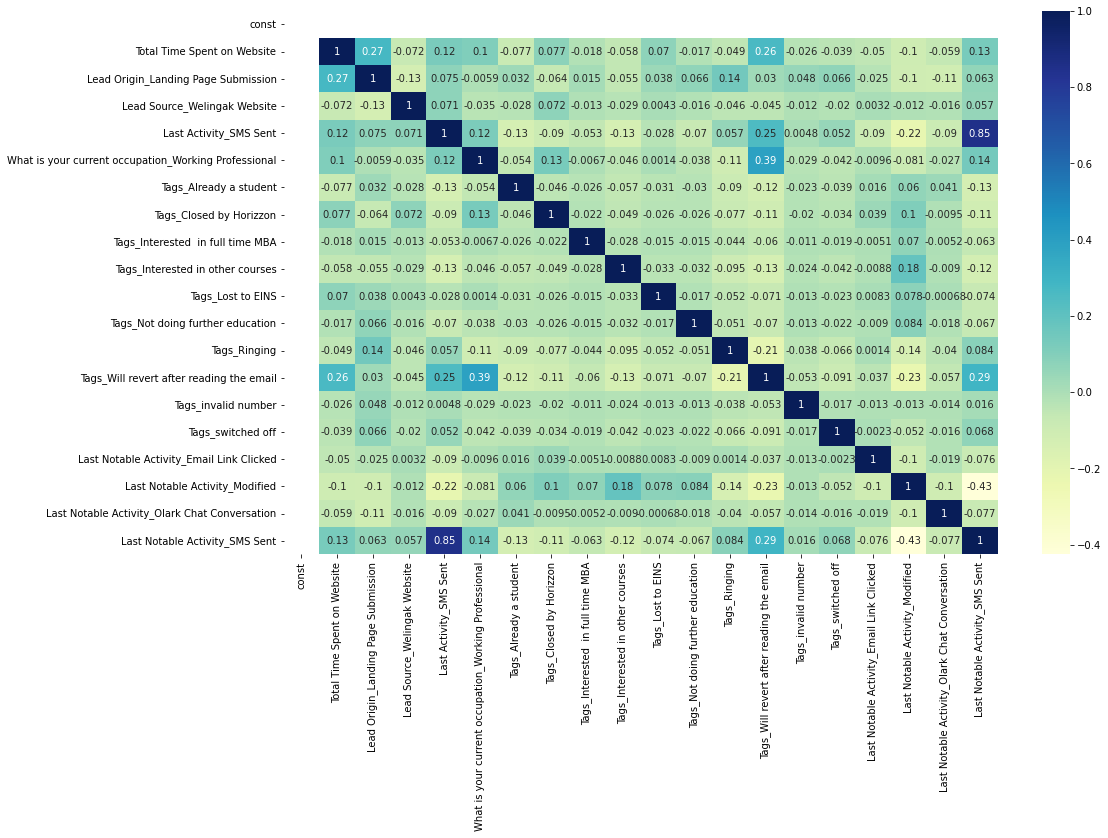

In [172]:
## checking the the correlation matrix to find out correlation between predictor variable
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new2.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [173]:
## 'Last Notable Activity_SMS Sent' and 'Last Activity_SMS Sent' highly correlated(0.85) , 
##so removing Last Notable Activity_SMS and creating model 3

# Model 3

In [174]:
X_train_new3 = X_train_new2.drop(['Last Notable Activity_SMS Sent'], axis = 1)

In [175]:
X_train_new3 = sm.add_constant(X_train_new3)
logregm3 = sm.GLM(y_train,X_train_new3,family = sm.families.Binomial())
m3 = logregm3.fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1280.7
Date:                Tue, 21 Mar 2023   Deviance:                       2561.4
Time:                        10:41:40   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6068
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7998      0.091     -8.782      0.000      -0.978      -0.621
Total Time Spent on Website                              0.9275      0.054     17.293      0.000       0.822       1.033
Lead Origin_Landing Page Submission                     -1.0688      0.113     -9.497      0.000      -1.289      -0.848
Lead Source_Welingak Website                             4.7206      0.742      6.365      0.000       3.267       6.174
Last Activity_SMS Sent                                   2.0221      0.115     17.626      0.000       1.797       2.247
What is your current occupation_Working Professional     0.7464      0.355      2.105      0.035       0.051       1.442
Tags_Already a student                                  -3.3484      0.724     -4.622      0.000      -4.768      -1.929
Tags_Closed by Horizzon                                  7.7394      1.012      7.647      0.000       5.756       9.723
Tags_Interested  in full time MBA                       -2.0335      0.769     -2.645      0.008      -3.540      -0.527
Tags_Interested in other courses                        -1.7848      0.354     -5.041      0.000      -2.479      -1.091
Tags_Lost to EINS                                        6.4684      0.734      8.808      0.000       5.029       7.908
Tags_Not doing further education                        -2.6081      1.018     -2.562      0.010      -4.603      -0.613
Tags_Ringing                                            -3.2905      0.231    -14.271      0.000      -3.742      -2.839
Tags_Will revert after reading the email                 4.5974      0.189     24.368      0.000       4.228       4.967
Tags_invalid number                                     -3.7010      1.098     -3.371      0.001      -5.853      -1.549
Tags_switched off                                       -3.5703      0.536     -6.661      0.000      -4.621      -2.520
Last Notable Activity_Email Link Clicked                -1.2443      0.459     -2.711      0.007      -2.144      -0.345
Last Notable Activity_Modified                          -1.7884      0.123    -14.523      0.000      -2.030      -1.547
Last Notable Activity_Olark Chat Conversation           -1.4328      0.424     -3.378      0.001      -2.264      -0.602
========================================================================================================================
"""

In [176]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                               const  5.40
13           Tags_Will revert after reading the email  1.59
17                     Last Notable Activity_Modified  1.23
5   What is your current occupation_Working Profes...  1.23
12                                       Tags_Ringing  1.22
1                         Total Time Spent on Website  1.21
2                 Lead Origin_Landing Page Submission  1.18
4                              Last Activity_SMS Sent  1.17
7                             Tags_Closed by Horizzon  1.13
9                    Tags_Interested in other courses  1.11
6                              Tags_Already a student  1.09
15                                  Tags_switched off  1.06
18      Last Notable Activity_Olark Chat Conversation  1.05
10                                  Tags_Lost to EINS  1.04
11                   Tags_Not doing further education  1.04
3                        Lead Source_Welingak Website  1.04
16           Last Notable Activity_Email Link Clicked  1.03
8                   Tags_Interested  in full time MBA  1.02
14                                Tags_invalid number  1.02

In [ ]:
##vif of all features less than 5

In [177]:
## checking the the correlation matrix to find out correlation between predictor variable
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new3.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [178]:
##'Tags_Will revert after reading the email' corelated with 'What is your current occupation_Working Professional;
##so dropping 'Tags_Will revert after reading the email' and creating model 4

# Model 4

In [179]:
X_train_new4 = X_train_new3.drop(['Tags_Will revert after reading the email'], axis = 1)

In [180]:
X_train_new4 = sm.add_constant(X_train_new4)
logregm4 = sm.GLM(y_train,X_train_new4,family = sm.families.Binomial())
m4 = logregm4.fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1913.4
Date:                Tue, 21 Mar 2023   Deviance:                       3826.7
Time:                        10:42:31   Pearson chi2:                 1.04e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5218
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1838      0.072      2.548      0.011       0.042       0.325
Total Time Spent on Website                              1.0020      0.045     22.189      0.000       0.914       1.091
Lead Origin_Landing Page Submission                     -0.8203      0.089     -9.250      0.000      -0.994      -0.646
Lead Source_Welingak Website                             3.9542      0.733      5.391      0.000       2.517       5.392
Last Activity_SMS Sent                                   1.8019      0.092     19.649      0.000       1.622       1.982
What is your current occupation_Working Professional     3.1869      0.247     12.920      0.000       2.703       3.670
Tags_Already a student                                  -4.6843      0.725     -6.458      0.000      -6.106      -3.263
Tags_Closed by Horizzon                                  6.5952      1.010      6.531      0.000       4.616       8.575
Tags_Interested  in full time MBA                       -3.7342      0.871     -4.287      0.000      -5.442      -2.027
Tags_Interested in other courses                        -3.0395      0.352     -8.645      0.000      -3.729      -2.350
Tags_Lost to EINS                                        5.3473      0.731      7.319      0.000       3.915       6.779
Tags_Not doing further education                        -3.8068      1.018     -3.740      0.000      -5.802      -1.812
Tags_Ringing                                            -4.3629      0.230    -18.955      0.000      -4.814      -3.912
Tags_invalid number                                     -4.7925      1.117     -4.290      0.000      -6.982      -2.603
Tags_switched off                                       -4.6133      0.532     -8.672      0.000      -5.656      -3.571
Last Notable Activity_Email Link Clicked                -1.1070      0.330     -3.358      0.001      -1.753      -0.461
Last Notable Activity_Modified                          -1.8227      0.095    -19.273      0.000      -2.008      -1.637
Last Notable Activity_Olark Chat Conversation           -1.8883      0.351     -5.379      0.000      -2.576      -1.200
========================================================================================================================
"""

In [181]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                               const  4.51
16                     Last Notable Activity_Modified  1.19
2                 Lead Origin_Landing Page Submission  1.18
1                         Total Time Spent on Website  1.16
4                              Last Activity_SMS Sent  1.15
12                                       Tags_Ringing  1.12
9                    Tags_Interested in other courses  1.09
7                             Tags_Closed by Horizzon  1.08
6                              Tags_Already a student  1.07
5   What is your current occupation_Working Profes...  1.07
17      Last Notable Activity_Olark Chat Conversation  1.05
3                        Lead Source_Welingak Website  1.04
10                                  Tags_Lost to EINS  1.03
11                   Tags_Not doing further education  1.03
14                                  Tags_switched off  1.03
15           Last Notable Activity_Email Link Clicked  1.03
8                   Tags_Interested  in full time MBA  1.02
13                                Tags_invalid number  1.01

In [182]:
## checking the the correlation matrix to find out correlation between predictor variable
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new4.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [183]:
## For model 4, all p values are significant, vif less  than 5, no high correlation also
## so taking model 4 as final model

# Prediction based on Model 4

In [184]:
##creating y _train predict
y_train_pred = m4.predict(X_train_new4)
y_train_pred[:10]

1871    0.006267
6795    0.347355
3516    0.007601
8105    0.138313
3934    0.074053
4844    0.998013
3297    0.003234
8071    0.999622
987     0.262743
7423    0.981373
dtype: float64

In [185]:
##creating DF with 'Converted' and predicted probability
Lead_train_pred = pd.DataFrame({"Lead Number":X_train["Lead Number"],"Converted":y_train.values,"Convert_prob":y_train_pred})
Lead_train_pred.head()

Lead Number  Converted  Convert_prob
1871       641410          0      0.006267
6795       597687          0      0.347355
3516       626825          0      0.007601
8105       587928          0      0.138313
3934       622366          0      0.074053

In [186]:
##Creating a new column 'Converted' pred with cutoff 0.5, ie, converted 1 if Conver_prob greater than 0.5 else 0
Lead_train_pred['Converted_pred'] = Lead_train_pred['Convert_prob'].apply(lambda x:1 if x>0.5 else 0)


In [187]:
Lead_train_pred.head()

Lead Number  Converted  Convert_prob  Converted_pred
1871       641410          0      0.006267               0
6795       597687          0      0.347355               0
3516       626825          0      0.007601               0
8105       587928          0      0.138313               0
3934       622366          0      0.074053               0

In [188]:
##Checking confusion matrix
confusion = metrics.confusion_matrix(Lead_train_pred['Converted'],Lead_train_pred['Converted_pred'])
print(confusion)

[[3693  309]
 [ 475 1991]]


In [189]:
##Lets check the over all accuracy
print(metrics.accuracy_score(Lead_train_pred['Converted'],Lead_train_pred['Converted_pred']))

0.8787878787878788


In [190]:
##Metrics beyond accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [191]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8073803730738037

In [192]:
# Let us calculate specificity
TN / float(TN+FP)

0.9227886056971514

In [193]:
# Let us calculate Precision
TP / float(TP+FP)

0.8656521739130435

In [194]:
##FPR
print(FP/ float(TN+FP))

0.07721139430284858


In [195]:
# Function for ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC plot')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [196]:
# Calcualte FPR, TPR
fpr, tpr, thresholds = metrics.roc_curve(Lead_train_pred['Converted'], Lead_train_pred['Convert_prob'], drop_intermediate = False )

In [197]:
# Draw ROC Curve
draw_roc(Lead_train_pred['Converted'], Lead_train_pred['Convert_prob'])

# Find optimal Cut off value

In [198]:
# Plot cutoff values
cutoff_values = [0.1,0.2,0.3,0.4,0.5,0.6]

for i in cutoff_values:
    Lead_train_pred[i] = Lead_train_pred['Convert_prob'].apply(lambda x:1 if x>i else 0)
    
Lead_train_pred.head()

Lead Number  Converted  Convert_prob  Converted_pred  0.1  0.2  0.3  \
1871       641410          0      0.006267               0    0    0    0   
6795       597687          0      0.347355               0    1    1    1   
3516       626825          0      0.007601               0    0    0    0   
8105       587928          0      0.138313               0    1    0    0   
3934       622366          0      0.074053               0    0    0    0   

      0.4  0.5  0.6  
1871    0    0    0  
6795    0    0    0  
3516    0    0    0  
8105    0    0    0  
3934    0    0    0

In [199]:
# Plot accuracy, sensitivity, specificity

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.1,0.2,0.3,0.4,0.5,0.6]
for i in num:
    cm1 = metrics.confusion_matrix(Lead_train_pred['Converted'], Lead_train_pred[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.773964  0.969586  0.653423
0.2   0.2  0.812461  0.948094  0.728886
0.3   0.3  0.849258  0.919708  0.805847
0.4   0.4  0.869048  0.834550  0.890305
0.5   0.5  0.878788  0.807380  0.922789
0.6   0.6  0.875696  0.772101  0.939530


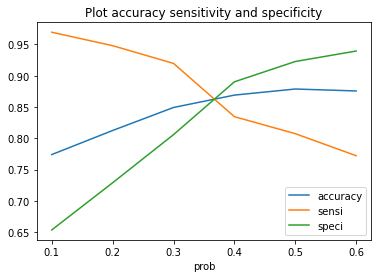

In [200]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title("Plot accuracy sensitivity and specificity")
plt.show()

In [201]:
##create the Confusion metrix at optomal cut off
Lead_train_pred['Convert_pred_op'] = Lead_train_pred['Convert_prob'].apply(lambda x: 1 if x>0.4 else 0)
confusion_op = metrics.confusion_matrix(Lead_train_pred['Converted'],Lead_train_pred['Convert_pred_op'])
confusion_op 

array([[3563,  439],
       [ 408, 2058]], dtype=int64)

In [202]:
##Metrics beyond accuracy
TP_op = 2058 # true positive 
TN_op= 3563 # true negatives
FP_op = 439 # false positives
FN_op= 408 # false negatives

In [203]:
# Let's see Accuracy
(TP_op+TN_op)/6468

0.8690476190476191

In [204]:
# Let's see the sensitivity/Recall 
TP_op / float(TP_op+FN_op)

0.8345498783454988

In [205]:
# Let us calculate specificity
TN_op / float(TN_op+FP_op)

0.8903048475762119

In [206]:
# Let us calculate precision
TP_op / float(TP_op+FP_op)

0.8241890268321986

# 0.4 is the Optimal cut off

# For train data set with 0.4 optimal cut off  :
Accuracy =  86.9%
Sensitivity /Recall = 83.45%
Specificity =  89.03%
Precision = 82.41%
  

In [209]:
##Precision - Recall Plot

In [210]:
## Calculate Precicion and Recall
p,r,thresholds = precision_recall_curve(Lead_train_pred['Converted'],Lead_train_pred['Convert_prob'])

In [211]:
# Plot precisio and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.title("Precision and Recall plot")
plt.show()

In [212]:
## Taking optimal Cut off as 0.4

# Validation on test data

In [213]:
X_train_new4 = X_train_new4.drop(['const'], axis=1)

In [214]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe
X_test_new = X_test1[X_train_new4.columns]



In [215]:
##Adding constant
X_test_new = sm.add_constant(X_test_new)

In [216]:
# Making predictions
y_test_pred = m4.predict(X_test_new)

In [217]:
y_test_pred[:10]

4269    0.950370
2376    0.750000
7766    0.930331
9199    0.000738
4359    0.331075
9186    0.802254
1631    0.582665
8963    0.447208
8007    0.062060
5324    0.639158
dtype: float64

In [218]:
##creating DF with 'Converted' and predicted probability
Lead_test_pred = pd.DataFrame({"Lead Number":X_test["Lead Number"],"Converted":y_test.values,"Convert_prob":y_test_pred})
Lead_test_pred.head()

Lead Number  Converted  Convert_prob
4269       619003          1      0.950370
2376       636884          1      0.750000
7766       590281          1      0.930331
9199       579892          0      0.000738
4359       617929          1      0.331075

In [219]:
##Creating a new column 'Converted' pred with cutoff 0.4(optimal cut off), ie, converted 1 if Conver_prob greater than 0.4 else 0
Lead_test_pred['Converted_pred'] = Lead_test_pred['Convert_prob'].apply(lambda x:1 if x>0.4 else 0)


In [220]:
Lead_test_pred.head()

Lead Number  Converted  Convert_prob  Converted_pred
4269       619003          1      0.950370               1
2376       636884          1      0.750000               1
7766       590281          1      0.930331               1
9199       579892          0      0.000738               0
4359       617929          1      0.331075               0

In [221]:
##Checking confusion matrix
confusion_test = metrics.confusion_matrix(Lead_test_pred['Converted'],Lead_test_pred['Converted_pred'])
print(confusion_test)

[[1480  197]
 [ 180  915]]


In [222]:
##Lets check the over all accuracy
print(metrics.accuracy_score(Lead_test_pred['Converted'],Lead_test_pred['Converted_pred']))

0.863997113997114


In [223]:
##Metrics beyond accuracy
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [224]:
# Let's see the sensitivity/Recall of our logistic regression model
TP_test / float(TP_test+FN_test)

0.8356164383561644

In [225]:
# Let us calculate specificity
TN_test / float(TN_test+FP_test)

0.8825283243887895

In [226]:
# Let us calculate precision
TP_test / float(TP_test+FP_test)

0.822841726618705

In [227]:
(TP_test / float(TP_test+FP_test))*(TP_test / float(TP_test+FN_test))

0.687580072927959

In [228]:
(TP_test / float(TP_test+FP_test))+(TP_test / float(TP_test+FN_test))

1.6584581649748693

In [229]:
2*((TP_test / float(TP_test+FP_test))*(TP_test / float(TP_test+FN_test))/(TP_test / float(TP_test+FP_test))+(TP_test / float(TP_test+FN_test)))

3.3424657534246576

In [230]:
##F1 score = 3.34

  # At optimal cut off - 0.4
Test data set  :
Accuracy =  86.39% 
Sensitivity / Recall = 83.56%
Specificity = 88.25%
Precision = 82.28%


In [231]:
##Merging train and test predictions

In [232]:
final_pred = pd.concat([Lead_train_pred[['Lead Number','Convert_prob']],Lead_test_pred[['Lead Number','Convert_prob']]])


In [233]:
final_pred.shape

(9240, 2)

In [234]:
final_pred.head()

Lead Number  Convert_prob
1871       641410      0.006267
6795       597687      0.347355
3516       626825      0.007601
8105       587928      0.138313
3934       622366      0.074053

In [235]:
## creating dataset copy
LeadData_F = LeadData.copy()

In [236]:
##merging Predictions with original dataframe
LeadData_F  = pd.merge(LeadData_F,final_pred,on = 'Lead Number', how = 'left')

In [237]:
LeadData_F.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [238]:
LeadData_F.shape

(9240, 38)

In [239]:
## create Lead Score coulumn from Convert_prob
LeadData_F['Lead Score'] = LeadData_F['Convert_prob'].apply(lambda x :round(x*100))

In [240]:
LeadData_F.head(200)

Prospect ID  Lead Number  \
0    7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1    2a272436-5132-4136-86fa-dcc88c88f482       660728   
2    8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3    0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4    3256f628-e534-4826-9d63-4a8b88782852       660681   
5    2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6    9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7    20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8    cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9    af465dfc-7204-4130-9e05-33231863c4b5       660616   
10   2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11   9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12   8bf76a52-2478-476b-8618-1688e07874ad       660562   
13   88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14   a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15   25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
16   3abb7c77-1634-4083-9a9f-861068220611       660540   
17   e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18   82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19   4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20   c4419c99-b002-408b-a6fd-fa100716592c       660479   
21   fd71ab5b-53b8-4105-9960-efedc44962fa       660478   
22   8fd38b83-5c32-4277-bcfb-499f34a01c56       660471   
23   ecbc6e69-29a9-44bf-804a-13079ef301bc       660461   
24   ecd117ca-375f-49ea-afd6-b52b84d00c69       660458   
25   31c326f0-4a9b-43a6-9006-99d3830fbcae       660447   
26   c494aca4-8c8e-4081-9784-41eb6346015e       660432   
27   6d143c0e-abae-425f-a2c0-52c2946cbd45       660424   
28   8247051c-f838-4a41-b39c-1f0b44c3d5e6       660423   
29   b3455e2e-8236-478a-b1aa-666ad3381722       660410   
30   da8c5ce5-52b5-4a4e-bf75-e533d2aca52c       660402   
31   d2055a36-b268-43a0-beeb-9a715f6a660d       660374   
32   c7d82991-3477-40ca-a616-db2d09228a55       660361   
33   5af0914a-fa65-48e1-b11e-b44849206dc3       660339   
34   bc19e116-132c-4e00-a3fa-caa1ddda2f4e       660333   
35   30422ea1-36fe-465e-9e68-41ee190fefb3       660321   
36   a8ecfc52-9988-498a-9a21-df747891b847       660312   
37   e60a54bc-0816-430e-a99a-019a8b5a27e5       660267   
38   e50b7515-b5a5-4691-a450-5e28ba99b472       660255   
39   d6686032-c65e-4495-a0f4-ba7471209356       660236   
40   daebea93-20bd-48be-b89b-85c7711ca0d7       660235   
41   3ec75559-60f8-46f0-9198-bd3d05c464aa       660222   
42   d262e52a-b8e1-4164-b869-bb199ddf75a9       660215   
43   abc432ac-7393-4312-b49f-c43702397416       660203   
44   85195b85-b384-4745-8e50-719566f70f52       660194   
45   fd31b6df-f961-43ba-8e81-618ce5aabfe5       660180   
46   18633077-5162-4cc6-8728-bc25f7a32fd1       660174   
47   3f04fd93-2884-45f6-a4fc-f3b6f234554b       660153   
48   86681269-67b1-4909-90c0-216136535815       660149   
49   319325b3-50b3-45d0-b730-c9df0b30b9ea       660128   
50   2def8175-7a88-405a-a932-669cacf60230       660087   
51   1f13cede-ebf7-4e65-84ee-7d76e86a9094       660070   
52   8597dacd-0b33-4b4f-ad9e-a9df020afd48       660069   
53   833153b1-e44b-4260-a4cc-5ef310cc548c       660050   
54   b9984279-2d76-41e0-a5f3-e14d6ff68f20       660048   
55   165a8ed0-7155-4b32-bb21-b356c51e0412       660030   
56   59e722da-edff-43d9-af61-f5c8bcc986c4       659998   
57   171defdc-6c7b-4486-9a3b-527de447d2d5       659963   
58   d93bfdc0-4719-4f0a-ad6b-31070823dfbb       659942   
59   d22bfe40-a444-4e97-b6b7-ccf40117710b       659937   
60   b90b70b9-5e60-41a5-87da-5eb753fc3391       659931   
61   aa613715-ff22-429d-9fbb-92da56b827aa       659925   
62   0327a12a-51cb-4782-a029-cc824e614833       659918   
63   dba70a60-f322-4372-b7d5-3d24026a4750       659896   
64   3ee81e25-e280-428d-94a8-af0178917bf5       659889   
65   a66b2a39-2f12-4eb4-b6e3-065d88ccf980       659875   
66   ee859f2e-a35f-4d2e-980e-8163da8ca667       659853   
67   34571884-9e2f-404c-bc30-d5e09309b06a       659849   
68   002233e4-c3d5-4a78-b64e

# Conclusion

# Train data :
Accuracy =  86.9%,
Sensitivity /Recall = 83.45%,
Specificity =  89.03%,
Precision = 82.41%

# Test data:

Test data set  :
Accuracy =  86.39%, 
Sensitivity / Recall = 83.56%,
Specificity = 88.25%,
Precision = 82.28%,

# So the Accuracy, Sensitivity and Specificity value of both train and test set are closer


# So over all model (Model 5) is good

In [191]:
##These are the important features(and its coefficient) that directly make positive impact on Conversion
Total Time Spent on Website(1.0020)
Lead Source_Welingak Website(3.9542)
Last Activity_SMS Sent(1.8019)
What is your current occupation_Working Professional(3.1869)
Tags_Closed by Horizzon(6.5952)
Tags_Lost to EINS(5.3473)
